Types of Transformation

1. Normalization and Standardization
2. Scaling to minimum and maximum values
3. scaling to median and quantiles
4. Guassian Transformation

    Logarithmic Transformation    
    Reciprocal  Transformation    
    Square Root  Transformation    
    Exponential  Transformation    
    Box Cox  Transformation

# Standardization:

We try to bring all the variables or features to a similar scale.standardization means centering the variable at zero. 
z=(x-x_mean)/std

In [2]:
import pandas as pd
df=pd.read_csv('Datasets/titanic.csv',usecols=['Age','Survived','Fare','Pclass'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [6]:
df.Age.fillna(df.Age.median(),inplace=True)

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df) #Transformation happends feature wise not row wise.
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

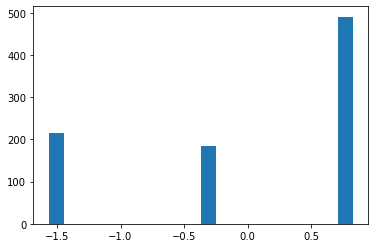

In [16]:
plt.hist(df_scaled[:,1],bins=20)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([-0.78927234, -0.68645923, -0.58364612, -0.48083301, -0.37801991,
        -0.2752068 , -0.17239369, -0.06958059,  0.03323252,  0.13604563,
         0.23885873,  0.34167184,  0.44448495,  0.54729805,  0.65011116,
         0.75292427,  0.85573737,  0.95855048,  1.06136359,  1.16417669,
         1.2669898 ]),
 <a list of 20 Patch objects>)

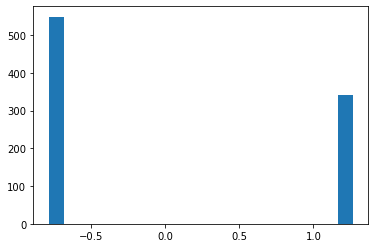

In [18]:
plt.hist(df_scaled[:,0],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

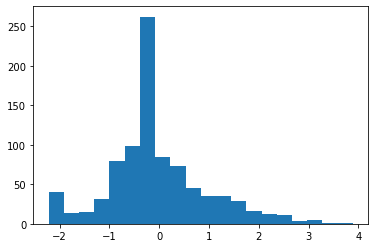

In [20]:
plt.hist(df_scaled[:,2],bins=20)

# MinMax Scaling

MinMax scaling scales the values between 0 to 1

x_scaled=(x-x_min)/x_max-x_min

In [23]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


# Robust Scaler

It is used to scale the feature to median and quantiles

iqr=q3-q1

x_scaled=(x-x.median)/iqr

0,1,2,3,4,5,6,7,8,9,10

1 -> 10 percentile --> 10% of all values in this group is less than 1

9 -> 90 percentile --> 90% of all values in this group is less than 9

In [27]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


# Gaussian Transformation

When features dont follow normal distribution,then apply some mathematical formulas to
transform that feature to get normal distribution

Some machine learning algorithms like linear and logistic assume that the features are
normally distributed for better accuracy and performance

In [29]:
df=pd.read_csv('Datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [32]:
### Fill NAN
df['Age']=df['Age'].fillna(df['Age'].median())
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [35]:
## If you want to check wheather feature is guassian or normal distribution use Q-Q plot

import scipy.stats as stat
import pylab

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

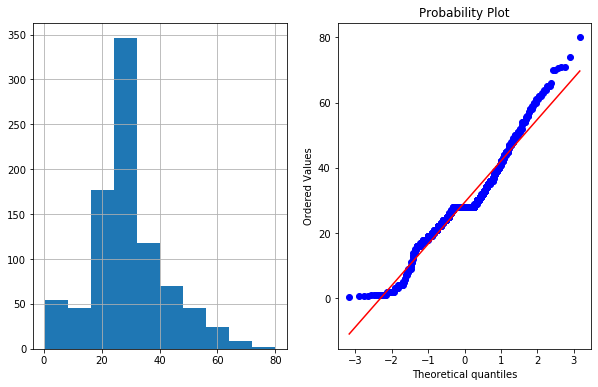

In [36]:
plot_data(df,'Age')

# Logarithamic Transformation

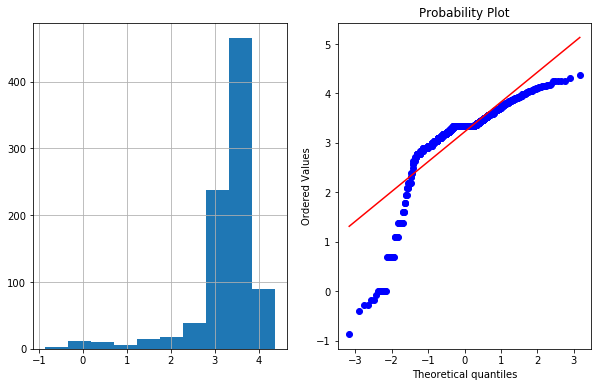

In [38]:
import numpy as np
df['Age_log']= np.log(df['Age'])
plot_data(df,'Age_log')

#Straight line should connect to all the points.. But here its not connecting to all the points.
# Hence, dont use logarithamic transformation for Age column

# Resiprocal Transformation

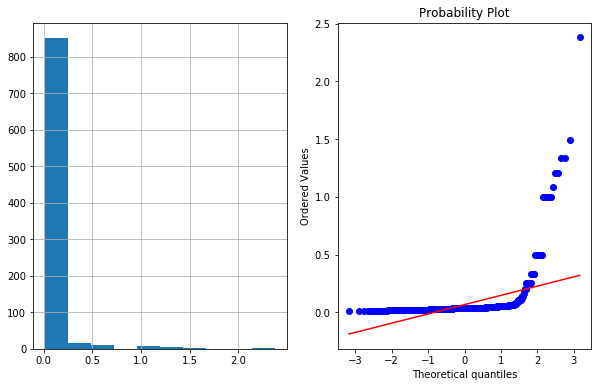

In [41]:
df['Age_resiprocal']=1/df['Age']
plot_data(df,'Age_resiprocal')

# Square Root Tranformation

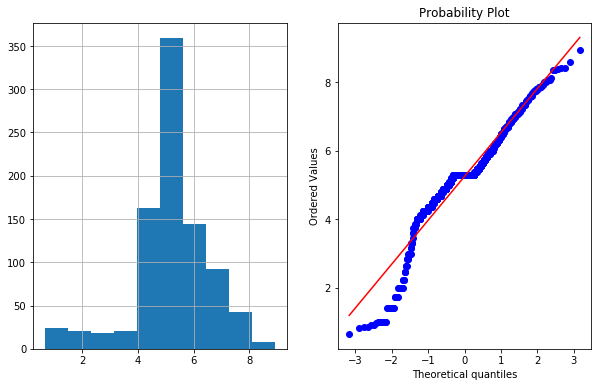

In [42]:
df['Age_square']=df.Age**(1/2)
plot_data(df,'Age_square')

# Exponential Transformation

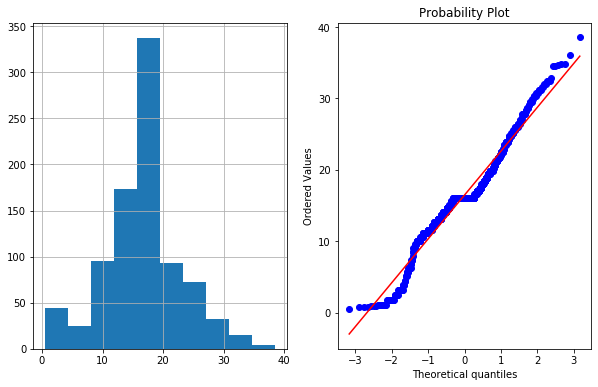

In [44]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

# Box Cox Transformation

In [46]:
df['Age_boxcox'],parameters=stat.boxcox(df['Age'])
print(parameters)

0.7964531473656952


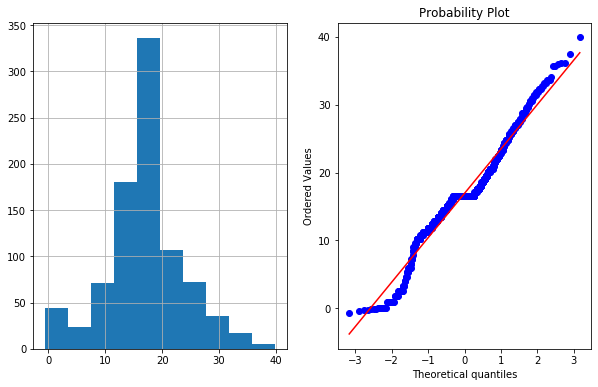

In [49]:
plot_data(df,'Age_boxcox')

# Fare Transformation

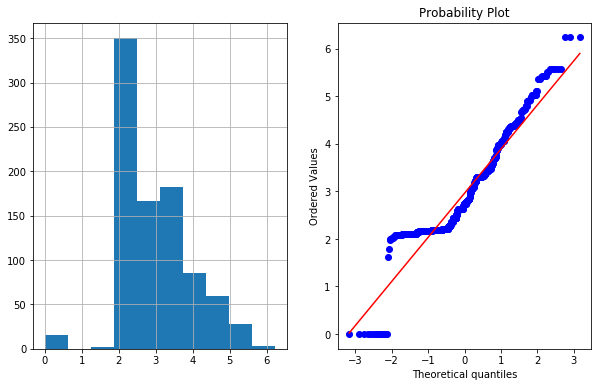

In [52]:
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')